# Homework #2

Practicing Python and basic inferential statistics.

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind

In [2]:
charpath = Path('../labs/Feb1Pandas/character_list5.csv')
characters = pd.read_csv(charpath, encoding = 'latin1')  # note encoding
characters.head()

,script_id,imdb_character_name,words,gender,age
0,280,betty,311,f,35.0
1,280,carolyn johnson,873,f,NaN
2,280,eleanor,138,f,NaN
3,280,francesca johns,2251,f,46.0
4,280,madge,190,f,46.0


In [3]:
moviepath = Path('../labs/Feb1Pandas/meta_data7.csv')
movies = pd.read_csv(moviepath, encoding = 'latin1')
movies.head()

,script_id,imdb_id,title,year,gross,lines_data
0,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774774443342577775657744434444564456...
1,1512,tt0147800,10 Things I Hate About You,1999,65.0,1777752320274533344457777722433777334443764677...
2,1514,tt0417385,12 and Holding,2005,NaN,5461357777754212454544441367774433446547647753...
3,1517,tt2024544,12 Years a Slave,2013,60.0,4567334777777777777777447777756477777444777777...
4,1520,tt1542344,127 Hours,2010,20.0,453513352345765766777777773340


## Assignment 1

We've seen that the mean age of actors on screen differs for men and for women.

Does it also change over historical time, as we move from the 1940s to the present?

Let's divide movies into two roughly equal-sized groups. To do that, we need to find the median year.

In [4]:
np.median(movies['year'])

2001.0

So we'll compare everything up to 2000 and everything thereafter. Does the mean age of characters differ significantly between these two groups of movies?

Assume that "significant" here means *p* < .05.

Also assume that we're excluding "vampires," i.e., characters older than 100.

You don't need to work through a permutation test; you can use ```ttest_ind.``` The challenge here is rather that it's difficult to construct sets of characters distinguished by release date of the film, since release date is recorded in ```movies``` and character ages are in ```characters.```

Once you've done that, a) visualize the distributions of character ages in both periods, b) measure the difference of means, and c) test the difference for statistical significance.

If the difference of means is statistically significant, does it also seem to you practically meaningful?

In [6]:
movies = movies.set_index('script_id')
movies.head()

,imdb_id,title,year,gross,lines_data
script_id,,,,,
1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774774443342577775657744434444564456...
1512,tt0147800,10 Things I Hate About You,1999,65.0,1777752320274533344457777722433777334443764677...
1514,tt0417385,12 and Holding,2005,NaN,5461357777754212454544441367774433446547647753...
1517,tt2024544,12 Years a Slave,2013,60.0,4567334777777777777777447777756477777444777777...
1520,tt1542344,127 Hours,2010,20.0,453513352345765766777777773340


First we need to join the two dataframes. Note that we've already set the index on ```movies``` to align with a column in ```characters.``` 

In [35]:
chars_w_dates = characters.join(movies, on = 'script_id', how = 'left')
chars_w_dates.head()

,script_id,imdb_character_name,words,gender,age,imdb_id,title,year,gross,lines_data
0,280,betty,311,f,35.0,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...
1,280,carolyn johnson,873,f,NaN,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...
2,280,eleanor,138,f,NaN,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...
3,280,francesca johns,2251,f,46.0,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...
4,280,madge,190,f,46.0,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...


We can filter the data by removing characters whose age is over 100, or whose age is not a number. Note that filtering with a comparison on age automatically removes the NaNs, since ```NaN < 100``` returns False. (So does  ```NaN > 100```.) Beware, however: ```NaN != 100``` would be True.

In [36]:
print('Shape of data before removing vampires', chars_w_dates.shape)
chars_w_dates = chars_w_dates.loc[chars_w_dates.
print("Before dropping NaNs: ", chars_w_dates.shape)
chars_w_dates = chars_w_dates.dropna(axis = 'rows', subset = ['age'])
print("After dropping NaNs: ", chars_w_dates.shape)

Shape of data before removing vampires (23048, 10)
Before dropping NaNs:  (18246, 10)
After dropping NaNs:  (18246, 10)


In [37]:
pre2001char_ages = chars_w_dates.loc[chars_w_dates['year'] < 2001, 'age']

In [38]:
post2000char_ages = chars_w_dates.loc[chars_w_dates['year'] >= 2001, 'age']

#### A) Visualize distributions

There are many valid ways to do this. Plotting two histograms is a good choice, and it's what I showed you to do in the previous notebook, so it's the right thing to choose here. Here's another alternative, though: a [Kernel Density Estimation](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) plot. In essence it's a continuous alternative to binned histograms.  The disadvantage is that you don't get a very interpretable y axis. The advantage is that it permits close comparisons of distributions as continuous (smoothed) curves.

<AxesSubplot:ylabel='Density'>

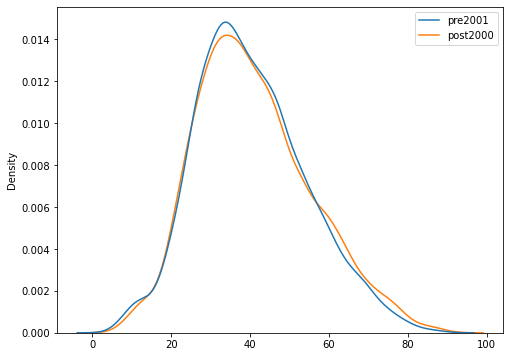

In [43]:
import seaborn as sns
charages = pd.DataFrame({'pre2001': pre2001char_ages, 'post2000': post2000char_ages})
plt.figure(figsize = (8,6))
sns.kdeplot(data = charages) 

The distributions are very similar. It's really a subtle difference!

#### B) Measure the difference of means.

In [68]:
print("Pre 2001 mean: ", np.mean(pre2001char_ages))
print("Post 2000 mean: ", np.mean(post2000char_ages))
print(np.mean(post2000char_ages) - np.mean(pre2001char_ages))

Pre 2001 mean:  40.30517203594127
Post 2000 mean:  41.021271929824564
0.7160998938832961


#### C) Is the difference significant at p < .05?

Yes, it is. If these two samples were drawn from a similarly distributed population, we would only rarely see this difference of means. But note that the difference is still practically small: it's less than a year!

In [40]:
ttest_ind(pre2001char_ages, post2000char_ages)

Ttest_indResult(statistic=-3.371014125715197, pvalue=0.0007504737862513238)

## Assignment 2

In our lab work, and in assignment 1, we looked at the distribution of ages as a simple histogram that counted the numbers of characters in each "bin." But the distribution of dialogue is probably a different matter; for instance, children and very old people may appear in movies, but get relatively few lines.

Explore this question by visualizing the number *of words* assigned to characters of different ages (between say 0 and 100). Produce visualizations for both women and men. You don't have to perform any statistical tests, but write a paragraph describing hypotheses this exploratory data analysis might lead you to formulate.

In [50]:
print(characters.shape)
valid_characters = characters.loc[characters['age'] < 100, : ]
print(valid_characters.shape)

(23048, 5)
(18246, 5)


We could plot a scatterplot of all characters as individual points, with the y axis as the number of words they speak, and the x axis as their age. That's a valid solution for the assignment, but it can be hard to distinguish changes in the number-of-words-per-character from changes in the number of characters.

Another approach is to sum all words spoken by characters of a particular gender and age. We can do this with the ```.groupby()``` method.

In [51]:
genderandage = valid_characters.groupby(['gender', 'age'], as_index = False).sum()

In [52]:
genderandage = genderandage.drop('script_id', axis = 'columns')
genderandage.head()

,gender,age,words
0,?,78.0,224
1,?,90.0,312
2,f,4.0,272
3,f,5.0,132
4,f,6.0,2406


### Visualizing the distribution of words 

We can superimpose the total number of words spoken at each age, for both women and men.

<AxesSubplot:xlabel='age', ylabel='words'>

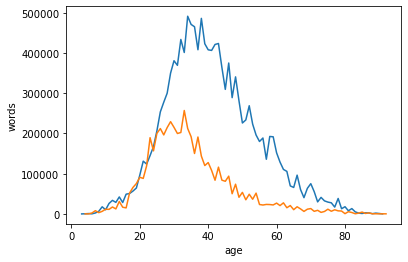

In [55]:
sns.lineplot(data = genderandage.loc[genderandage['gender'] == 'm', : ], x = 'age', y = 'words')
sns.lineplot(data = genderandage.loc[genderandage['gender'] == 'f', : ], x = 'age', y = 'words')

### Hypotheses that might be suggested

There were a wide variety of valid answers here. There's certainly a striking peak in early adulthood, for both women and men. There are clearly fewer total lines for women than for men. 

It's not easy to tell, on visual inspection, whether the *shape* of the curves is significantly different by gender, but it does appear that the peak age of getting to talk on screen may be earlier (younger) for women. Is this because there are simply more young women characters, or because young women get to talk more--on a per-person basis--than older female characters?

The cells below start to investigate that hypothesis.

In [60]:
# counting characters

gendercounts = valid_characters.groupby(['gender', 'age'], as_index = False).count()
gendercounts = gendercounts.drop(['script_id', 'words'], axis = 'columns')
gendercounts.columns = ['gender', 'age', 'charcount']
gendercounts.head()

,gender,age,charcount
0,?,78.0,1
1,?,90.0,1
2,f,4.0,1
3,f,5.0,1
4,f,6.0,8


<AxesSubplot:xlabel='age', ylabel='words'>

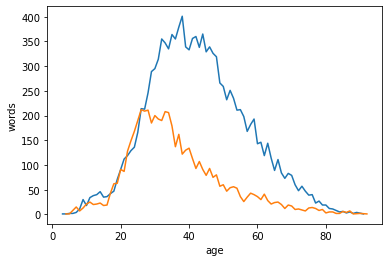

In [58]:
sns.lineplot(data = gendercounts.loc[gendercounts['gender'] == 'm', : ], x = 'age', y = 'words')
sns.lineplot(data = gendercounts.loc[gendercounts['gender'] == 'f', : ], x = 'age', y = 'words')

In [62]:
# estimating dialogue per character

wordsperwoman = gendercounts.loc[gendercounts['gender'] == 'f', : ]
wordsperwoman = wordsperwoman.merge(genderandage.loc[genderandage['gender'] == 'f', : ], on = 'age')
wordsperwoman['per'] = wordsperwoman['words'].divide(wordsperwoman['charcount'])
wordsperwoman.head()

,gender_x,age,charcount,gender_y,words,per
0,f,4.0,1,f,272,272.000000
1,f,5.0,1,f,132,132.000000
2,f,6.0,8,f,2406,300.750000
3,f,7.0,15,f,8158,543.866667
4,f,8.0,7,f,3260,465.714286


<AxesSubplot:xlabel='age', ylabel='per'>

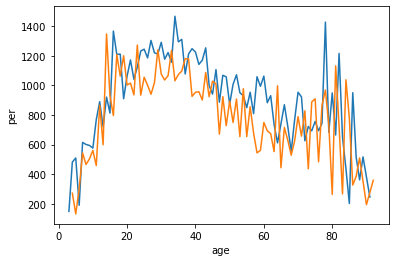

In [67]:
wordsperman = gendercounts.loc[gendercounts['gender'] == 'm', : ]
wordsperman = wordsperman.merge(genderandage.loc[genderandage['gender'] == 'm', : ], on = 'age')
wordsperman['per'] = wordsperman['words'].divide(wordsperman['charcount'])
sns.lineplot(data = wordsperman, x = 'age', y = 'per')
sns.lineplot(data = wordsperwoman, x = 'age', y = 'per')

The curve of dialogue-per-character (by age) is not drastically similar for the two genders. It does look a bit like there are simply more young female characters. But this conclusion is importantly confounded by the fact that our dataset doesn't necessarily include all the characters for any movie. That selection process is something we would need to understand more fully before drawing any firm conclusion.